In [98]:
import pandas as pd
import math
from google.cloud import storage


In [99]:
client = storage.Client(project="uk-election-406413")
bucket = client.bucket("ukelectiondata")
files = bucket.list_blobs()
file_names = [file.name for file in files]


In [100]:
election_results = bucket.blob("full_df.csv")
election_results.download_to_filename('/Users/andreabrumana/code/willgreen93/UK_election/raw_data/full_data.csv')


In [116]:
data = pd.read_csv('/Users/andreabrumana/code/willgreen93/UK_election/raw_data/full_data.csv')

data.groupby('year').count()


,Unnamed: 0,Constituency,ONSConstID,Home_owners,Private_renters,Social_renters,0-9,10-19,20-29,30-39,...,labour_vote_share,liberal_democrats_votes,liberal_democrats_vote_share,main_parties_votes,main_parties_vote_share,other_parties_votes,other_parties_vote_share,winning_party,incumbent_party,winning_party_changed
year,,,,,,,,,,,,,,,,,,,,,
2010,573,573,573,573,573,573,573,573,573,573,...,573,573,573,573,573,573,573,573,560,573
2015,573,573,573,573,573,573,573,573,573,573,...,573,573,573,573,573,573,573,573,573,573
2017,573,573,573,573,573,573,573,573,573,573,...,573,573,573,573,573,573,573,573,573,573
2019,573,573,573,573,573,573,573,573,573,573,...,573,573,573,573,573,573,573,573,573,573
2024,573,573,573,573,573,573,573,573,573,573,...,0,0,0,0,0,0,0,0,573,0


In [150]:
#data.columns[0]

data.drop(data.columns[0], axis=1, inplace=True)
data.dropna(subset=['incumbent_party'], inplace=True)

data_pre = data[data['year'] != 2024]
data_new = data[data['year'] == 2024]


X = data_pre[['Home_owners', 'Private_renters','Social_renters',
          '0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
          '60-69', '70-79', '80+',
          'Asian', 'Black', 'Mixed', 'Other', 'White',
          'Conservative_average', 'Conservative_max', 'Conservative_min', 'Conservative_Pre_GE_poll',
          'Labour_average', 'Labour_max', 'Labour_min', 'Labour_Pre_GE_poll',
          'LD_average', 'LD_max', 'LD_min', 'LD_Pre_GE_poll', 'incumbent_party']]
y= data_pre[['winning_party']]


X_new = data_new[['Home_owners', 'Private_renters','Social_renters',
          '0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
          '60-69', '70-79', '80+',
          'Asian', 'Black', 'Mixed', 'Other', 'White',
          'Conservative_average', 'Conservative_max', 'Conservative_min', 'Conservative_Pre_GE_poll',
          'Labour_average', 'Labour_max', 'Labour_min', 'Labour_Pre_GE_poll',
          'LD_average', 'LD_max', 'LD_min', 'LD_Pre_GE_poll', 'incumbent_party']]


display(X_new.columns)
display(X.columns)


Index(['Home_owners', 'Private_renters', 'Social_renters', '0-9', '10-19',
       '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'Asian',
       'Black', 'Mixed', 'Other', 'White', 'Conservative_average',
       'Conservative_max', 'Conservative_min', 'Conservative_Pre_GE_poll',
       'Labour_average', 'Labour_max', 'Labour_min', 'Labour_Pre_GE_poll',
       'LD_average', 'LD_max', 'LD_min', 'LD_Pre_GE_poll', 'incumbent_party'],
      dtype='object')

Index(['Home_owners', 'Private_renters', 'Social_renters', '0-9', '10-19',
       '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'Asian',
       'Black', 'Mixed', 'Other', 'White', 'Conservative_average',
       'Conservative_max', 'Conservative_min', 'Conservative_Pre_GE_poll',
       'Labour_average', 'Labour_max', 'Labour_min', 'Labour_Pre_GE_poll',
       'LD_average', 'LD_max', 'LD_min', 'LD_Pre_GE_poll', 'incumbent_party'],
      dtype='object')

In [152]:
# import seaborn as sns

# # Heatmap of pairwise correlations
# correlation_matrix = data_pre.corr()
# column_names = correlation_matrix.columns
# sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");


In [137]:
X.head(1)


,year,Home_owners,Private_renters,Social_renters,0-9,10-19,20-29,30-39,40-49,50-59,...,Conservative_Pre_GE_poll,Labour_average,Labour_max,Labour_min,Labour_Pre_GE_poll,LD_average,LD_max,LD_min,LD_Pre_GE_poll,incumbent_party
0,2010,0.644274,0.151463,0.204263,0.1096,0.1164,0.1227,0.1266,0.138,0.1357,...,0.35,0.323492,0.408,0.232,0.281,0.183279,0.26,0.133,0.26,labour


In [138]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

#encoded_data = encoder.fit_transform(X[['incumbent_party']])

X[encoder.get_feature_names_out()] = encoder.fit_transform(X[['incumbent_party']])
X.drop(columns=["incumbent_party", "incumbent_party_other_parties"], inplace=True)
X.head(2)


/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/var/folders/bq/jnyjwp3x1l52s_tgtr9v62kh0000gn/T/ipykernel_86893/1850517038.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[encoder.get_feature_names_out()] = encoder.fit_transform(X[['incumbent_party']])
/var/folders/bq/jnyjwp3x1l52s_tgtr9v62kh0000gn/T/ipykernel_86893/1850517038.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,year,Home_owners,Private_renters,Social_renters,0-9,10-19,20-29,30-39,40-49,50-59,...,Labour_max,Labour_min,Labour_Pre_GE_poll,LD_average,LD_max,LD_min,LD_Pre_GE_poll,incumbent_party_conservative,incumbent_party_labour,incumbent_party_liberal_democrats
0,2010,0.644274,0.151463,0.204263,0.1096,0.1164,0.1227,0.1266,0.1380,0.1357,...,0.408,0.232,0.281,0.183279,0.26,0.133,0.260,0.0,1.0,0.0
1,2015,0.659775,0.136265,0.203960,0.1128,0.1095,0.1232,0.1293,0.1289,0.1422,...,0.428,0.281,0.336,0.103623,0.27,0.074,0.083,0.0,1.0,0.0


In [139]:
X_new


,year,Home_owners,Private_renters,Social_renters,0-9,10-19,20-29,30-39,40-49,50-59,...,Conservative_Pre_GE_poll,Labour_average,Labour_max,Labour_min,Labour_Pre_GE_poll,LD_average,LD_max,LD_min,LD_Pre_GE_poll,incumbent_party
4,2024,0.683026,0.113468,0.203506,0.110,0.117,0.121,0.133,0.122,0.137,...,0.263,0.390565,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,labour
9,2024,0.713075,0.165503,0.121423,0.094,0.098,0.098,0.103,0.108,0.151,...,0.263,0.390565,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,conservative
14,2024,0.671090,0.172328,0.156583,0.129,0.111,0.118,0.150,0.143,0.142,...,0.263,0.390565,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,conservative
19,2024,0.768726,0.083391,0.147883,0.109,0.110,0.105,0.113,0.120,0.151,...,0.263,0.390565,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,conservative
24,2024,0.753809,0.121427,0.124764,0.127,0.134,0.085,0.121,0.149,0.140,...,0.263,0.390565,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,conservative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,2024,0.522561,0.140180,0.337258,0.148,0.115,0.114,0.164,0.128,0.127,...,0.263,0.390565,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,labour
2849,2024,0.704032,0.141064,0.154904,0.110,0.105,0.100,0.118,0.115,0.142,...,0.263,0.390565,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,conservative
2854,2024,0.704150,0.145188,0.150661,0.104,0.104,0.098,0.104,0.112,0.142,...,0.263,0.390565,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,conservative
2859,2024,0.542441,0.264085,0.193474,0.094,0.103,0.255,0.148,0.108,0.109,...,0.263,0.390565,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,labour


In [140]:
X_new[encoder.get_feature_names_out()] = encoder.fit_transform(X_new[['incumbent_party']])
X_new.drop(columns=["incumbent_party", "incumbent_party_other_parties"], inplace=True)
X_new.head(2)


/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/var/folders/bq/jnyjwp3x1l52s_tgtr9v62kh0000gn/T/ipykernel_86893/1525045468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[encoder.get_feature_names_out()] = encoder.fit_transform(X_new[['incumbent_party']])
/var/folders/bq/jnyjwp3x1l52s_tgtr9v62kh0000gn/T/ipykernel_86893/1525045468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,year,Home_owners,Private_renters,Social_renters,0-9,10-19,20-29,30-39,40-49,50-59,...,Labour_max,Labour_min,Labour_Pre_GE_poll,LD_average,LD_max,LD_min,LD_Pre_GE_poll,incumbent_party_conservative,incumbent_party_labour,incumbent_party_liberal_democrats
4,2024,0.683026,0.113468,0.203506,0.110,0.117,0.121,0.133,0.122,0.137,...,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,0.0,1.0,0.0
9,2024,0.713075,0.165503,0.121423,0.094,0.098,0.098,0.103,0.108,0.151,...,0.515,0.291,0.444,0.090609,0.12,0.067,0.108,1.0,0.0,0.0


In [141]:
y


,winning_party
0,labour
1,labour
2,labour
3,labour
5,conservative
...,...
2858,labour
2860,conservative
2861,conservative
2862,conservative


In [142]:
# # I need to encode the y variable
# from sklearn.preprocessing import OneHotEncoder

# oh_encoder = OneHotEncoder(sparse_output=False)

# y_encoded = oh_encoder.fit_transform(y)
# y[oh_encoder.get_feature_names_out()] = y_encoded

# y.drop(columns=["winning_party"], inplace=True)
# y.head(2)


In [143]:
y.shape


(2279, 1)

# Logistic regression


In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8793859649122807


/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
# try with cross validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X_train, y_train, cv=5)

accuracy = cv_results['test_score'].mean()
accuracy


/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversion

0.8634141201264489

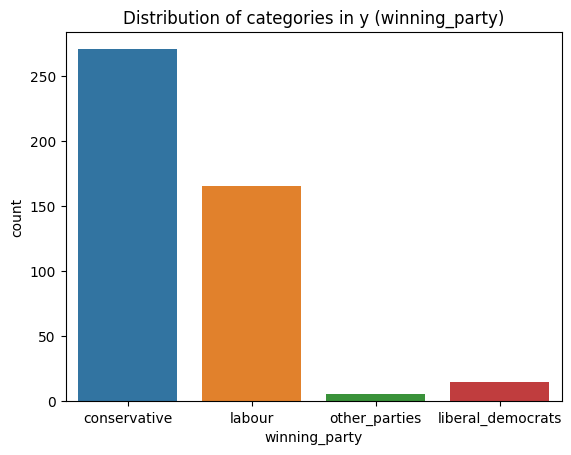

In [146]:
# Plotting the distribution of categories in y_test (winning_party)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="winning_party", data=y_test)
plt.title("Distribution of categories in y (winning_party)")
plt.show()


In [147]:
y_pred = pd.DataFrame(y_pred, columns=["winning_party"])


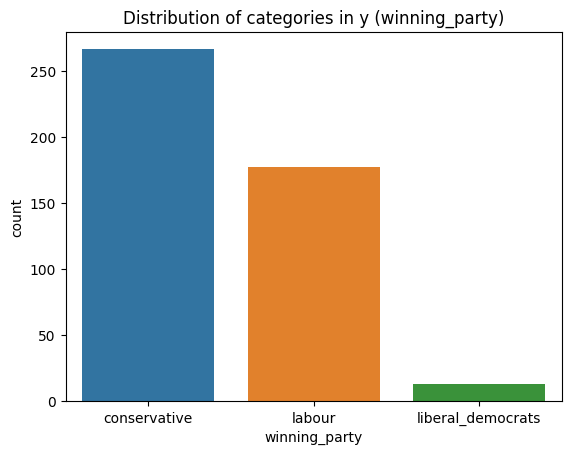

In [148]:
# Plotting the distribution of categories in y_pred
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="winning_party", data=y_pred)
plt.title("Distribution of categories in y (winning_party)")
plt.show()


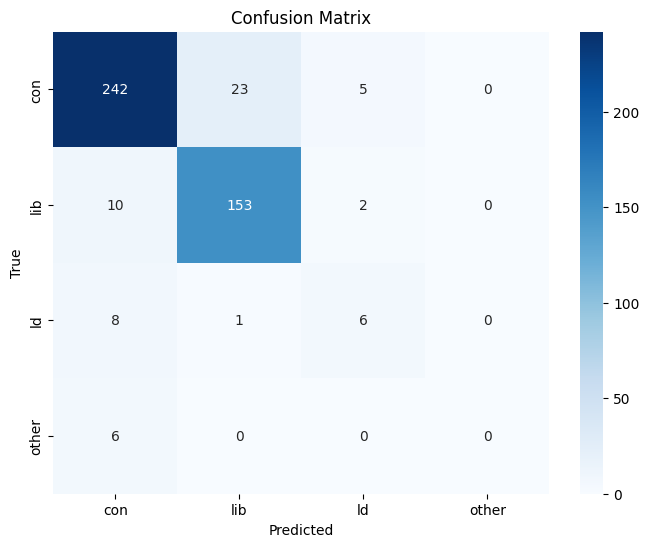

In [149]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your ground truth and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['con','lib','ld','other'], yticklabels=['con','lib','ld','other'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [130]:
# Prediction on the 2024 data
y_pred_new = model.predict(X_new)

from collections import Counter

value_counts = Counter(y_pred_new)

for value, count in value_counts.items():
    print(f"{value}: {count}")


labour: 200
conservative: 364
other_parties: 6
liberal_democrats: 3


# Multinomial Logistic Regression (Softmax Regression)


In [53]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test)

# Accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy 2:", accuracy_2)


Accuracy 2: 0.8991228070175439


/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


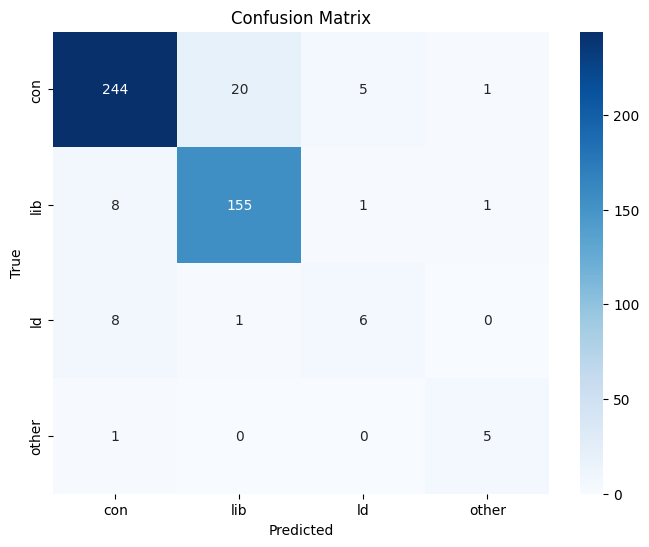

In [54]:
# Assuming y_true and y_pred are your ground truth and predicted labels
cm_2 = confusion_matrix(y_test, y_pred_2)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues", xticklabels=['con','lib','ld','other'], yticklabels=['con','lib','ld','other'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Random forest


In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy RF:", accuracy_rf)


/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy RF: 0.9232456140350878


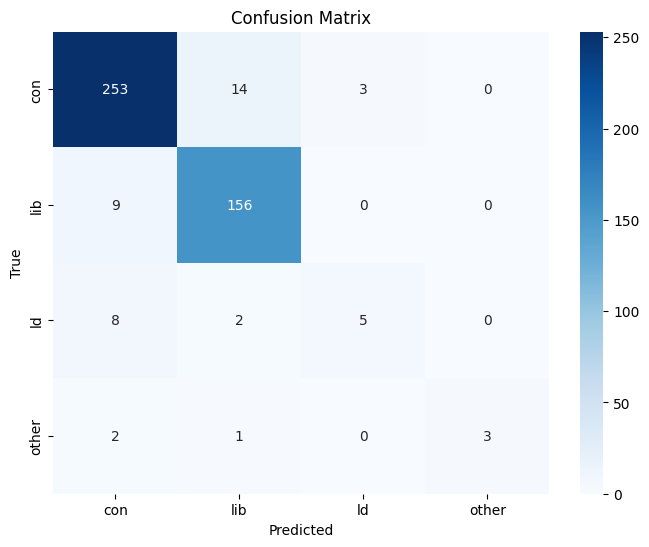

In [57]:
# Assuming y_true and y_pred are your ground truth and predicted labels
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['con','lib','ld','other'], yticklabels=['con','lib','ld','other'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [131]:
# Prediction on the 2024 data
y_pred_new = rf_model.predict(X_new)

from collections import Counter

value_counts = Counter(y_pred_new)

for value, count in value_counts.items():
    print(f"{value}: {count}")


labour: 204
conservative: 360
other_parties: 5
liberal_democrats: 4


# XGBClassifier

In [59]:
from xgboost import XGBClassifier

xgbc_model = XGBClassifier()

xgbc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgbc = xgbc_model.predict(X_test)

# Accuracy
accuracy_xgbc = accuracy_score(y_test, y_pred_xgbc)
print("Accuracy 2:", accuracy_xgbc)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['conservative' 'labour' 'liberal_democrats' 'other_parties']

# SVM

In [155]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1, decision_function_shape='ovr')


svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM:", accuracy_svm)


Accuracy SVM: 0.8925438596491229


/Users/andreabrumana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
